Traducción al español de http://www.astropy.org/astropy-tutorials/Coordinates.html hecha por Germán Chaparro.

# Usando `coordinates` y `table` para combinar y comparar catálogos

In [1]:
import urllib
import IPython.display

In [2]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
import astropy.coordinates as coord

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [4]:
hcg7_center = SkyCoord.from_name('Hcg 7')
hcg7_center

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>

Al final de la sección anterior, encontramos que HCG7 está en SDSS, lo que significa que podemos descargar catálogos de objetos directamente desde SDSS. Más adelante, combinaremos este catálogo con otro catálogo que cubra el mismo campo, permitiéndonos hacer gráficas combinando ambos catálogos.

Vamos a entrar a la base de datos SQL de SDSS usando el paquete [astroquery](https://astroquery.readthedocs.org).  This will require an internet connection and a working install of astroquery. Si usted no tiene este paquete, puede ignorar las próximas dos celdas, porque los archivos de datos están en el repositorio. Dependiendo de su versión de `astroquery`, puede que aparezca un Warning, que podemos ignorar sin problema.

In [5]:
from astroquery.sdss import SDSS
sdss = SDSS.query_region(coordinates=hcg7_center, radius=20*u.arcmin, 
                         spectro=True, 
                         photoobj_fields=['ra','dec','u','g','r','i','z'])

Los *queries* hechos a `astroquery` nos devuelve un objeto [`astropy.table.Table`](http://docs.astropy.org/en/stable/table/index.html).  Podemos trabajar con este objeto sin guardar nada en disco, pero en esta ocasión si lo haremos. De esta manera, al cerrar la sesión y volver, usted no tiene que hacer un *query* de nuevo.

(Esto no funcionará si usted no corrió la celda anterior. No hay problema, simplemente vaya a la celda que tiene ``Table.read`` y use la copia de esta tabla, incluida en el repositorio.)

In [6]:
sdss.write('HCG7_SDSS_photo.dat', format='ascii')

Si usted no tiene internet, simplemente puede leer la tabla desde Python corriendo la siguiente celda. Si usted hizo el query anterior, usted puede ignorar esta instrucción, dado que la tabla ya está almacenada en memoria como la variable llamada `sdss`.

In [7]:
sdss = Table.read('HCG7_SDSS_photo.dat', format='ascii')

Ahora tenemos un catálogo de objetos que obtuvimos de SDSS. Supongamos que usted tiene su propio catálogo de objetos en el mismo campo para compararlo con el de SDSS. En este caso usaremos un catálogo extraído de [2MASS](http://www.ipac.caltech.edu/2mass/).  Vamos a cargar este catálogo (que está en el repositorio) a Python.

In [8]:
twomass = Table.read('HCG7_2MASS.tbl', format='ascii')

Para combinar los catálogos, necesitamos objetos `SkyCoord`. Vamos a contruirlos a partir de las tablas que cargamos. Esto resulta ser directo: tomamos las columnas `ra` y `dec` de la tabla y se las damos al constructor `SkyCoord` constructor.  Primero hagamos una inspección de las tablas.

In [9]:
sdss[0:5]

ra,dec,u,g,r,i,z
float64,float64,float64,float64,float64,float64,float64
9.48301378408814,1.01446279778812,23.51845,22.13895,20.82912,19.92155,19.47135
9.48341569139689,0.976399855054926,22.81118,22.03554,22.10897,22.14101,21.64411
9.48404442918999,0.668844321347565,21.08944,18.71639,17.1889,15.90083,15.19136
9.48407695277552,1.19045532333533,23.89431,22.32235,21.00772,19.96612,19.64056
9.48440312780167,1.16365522098835,21.36359,20.86403,20.86694,20.54494,20.98261


In [10]:
twomass[0:5]

designation,ra,dec,r_k20fe,j_m_k20fe,j_msig_k20fe,j_flg_k20fe,h_m_k20fe,h_msig_k20fe,h_flg_k20fe,k_m_k20fe,k_msig_k20fe,k_flg_k20fe,k_ba,k_phi,sup_ba,sup_phi,r_ext,j_m_ext,j_msig_ext,h_m_ext,h_msig_ext,k_m_ext,k_msig_ext,cc_flg,dist,angle
,deg,deg,arcsec,mag,mag,,mag,mag,,mag,mag,,,deg,,deg,arcsec,mag,mag,mag,mag,mag,mag,,arcsec,deg
str16,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64
00402069+0052508,10.086218,0.880798,9.4,13.835,0.068,0,13.01,0.086,0,12.588,0.089,0,0.8,70,0.82,35,18.62,13.632,0.088,12.744,0.104,12.398,0.105,0,972.120611,91.538952
00395984+0103545,9.99935,1.06514,12.9,12.925,0.035,0,12.183,0.042,0,11.89,0.067,0,0.8,35,0.7,40,35.9,12.469,0.048,11.91,0.066,11.522,0.087,0,916.927636,45.951861
00401849+0049448,10.077062,0.82913,6.0,14.918,0.086,0,14.113,0.107,0,13.714,0.103,0,0.6,-15,1.0,90,11.35,14.631,0.121,13.953,0.169,13.525,0.161,0,962.489231,102.73149
00395277+0057124,9.969907,0.953472,5.3,14.702,0.049,0,14.248,0.069,0,13.899,0.095,0,0.6,-60,0.44,-50,10.59,14.62,0.144,14.15,0.296,13.73,0.2,0,601.136444,66.93659
00401864+0047245,10.077704,0.790143,7.6,15.585,0.134,1,15.003,0.18,1,14.049,0.142,1,0.5,30,0.46,30,14.48,14.977,0.138,14.855,0.303,13.653,0.18,0,1004.982128,110.53147


Ya que tenemos las columnas de `ra` y `dec` podemos usarlas para crear nuestros `SkyCoord`s.

No es necesario crear un `SkyCoord` para cada fila en la tabla. En vez de esto, aprovechamos que `SkyCoord` recibe *arrays* de valores de coordenadas, ya sean `Quantity`s, listas de *strings*, columnas de `Table`s, etc., y `SkyCoord` hará las operaciones tranquilamente elemento a elemento.

In [11]:
coo_sdss = SkyCoord(sdss['ra']*u.deg, sdss['dec']*u.deg)
coo_twomass = SkyCoord(twomass['ra'], twomass['dec'])

In [12]:
coo_twomass

<SkyCoord (ICRS): (ra, dec) in deg
    [(10.086218, 0.880798), ( 9.99935 , 1.06514 ), (10.077062, 0.82913 ),
     ( 9.969907, 0.953472), (10.077704, 0.790143), ( 9.895219, 0.859882),
     ( 9.873526, 1.063769), (10.139293, 0.818865), ( 9.888305, 0.597381),
     ( 9.959649, 0.595693), ( 9.928026, 0.627663), ( 9.912468, 0.642384),
     (10.028815, 0.683197), ( 9.824936, 0.699687), ( 9.699858, 0.582578),
     ( 9.766345, 0.849419), ( 9.805797, 0.864135), ( 9.824418, 0.912743),
     ( 9.744971, 0.957478), ( 9.828303, 0.891909), ( 9.80055 , 1.044691),
     ( 9.666268, 1.078968), ( 9.704872, 0.839244)]>

Hay una diferencia sutil. Para SDSS tuvimos que dar unidades, pero no para 2MASS. Esto es porque la tabla de 2MASS tiene unidades asociadas a las columnas, mientras que SDSS no tiene unidades.

Ahora usamos el método ``SkyCoord.match_to_catalog_sky`` para combinar ambos catálogos. El orden importa: combinamos 2MASS sobre SDSS porque hay muchas más entradas en SDSS, de manera que es probable que casi todos los objetos de 2MASS están en SDSS y no al revés.

In [13]:
idx_sdss, d2d_sdss, d3d_sdss = coo_twomass.match_to_catalog_sky(coo_sdss)

``idx`` da los índices de ``coo_sdss`` que se ajustan mejor a SDSS, mientras ``d2d`` y ``d3d`` son las distancias en cielo y en espacio real entre posibles coincidencias. En nuestro caso ignoraremos ``d3d`` porque no dimos información sobre la distancia a lo largo de la línea de visión. En cambio ``d2d`` nos da un buen diagnóstico de las posibles coincidencias:

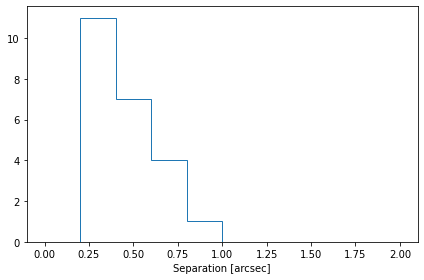

In [14]:
plt.hist(d2d_sdss.arcsec, histtype='step', range=(0,2))
plt.xlabel('Separation [arcsec]')
plt.tight_layout()

Se ve bien, pues todas las posibles coincidencias están dentro de un segundo de arco.

Ahora podemos calcular cosas como colores que combinen la fotometría de SDSS y 2MASS.

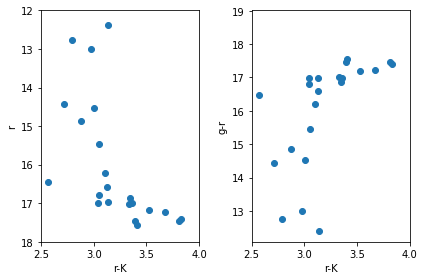

In [15]:
rmag = sdss['r'][idx_sdss]
grcolor = sdss['g'][idx_sdss] - rmag
rKcolor = rmag - twomass['k_m_ext']

plt.subplot(1, 2, 1)
plt.scatter(rKcolor, rmag)
plt.xlabel('r-K')
plt.ylabel('r')
plt.xlim(2.5, 4)
plt.ylim(18, 12) #mags go backwards!

plt.subplot(1, 2, 2)
plt.scatter(rKcolor, rmag)
plt.xlabel('r-K')
plt.ylabel('g-r')
plt.xlim(2.5, 4)
plt.tight_layout()

Ok, todos están dentro de un arcosegundo, lo cual es prometedor. Pero, ¿estamos seguros de que no es sólo que cualquier objeto tendría coincidencias dentro de un segundo de arco? Vamos a comprobarlo comparando con un conjunto de puntos aleatorios.

Primero creamos un conjunto de puntos uniformemente aleatorios (con un tamaño que coincida con `coo_twomass`) que cubran el mismo rango de RA/Decs que hay en `coo_sdss`. Esto lo haremos con el método `ptp()` (peak-to-peak).

In [16]:
ras_sim = np.random.rand(len(coo_twomass))*coo_sdss.ra.ptp() + coo_sdss.ra.min()
decs_sim = np.random.rand(len(coo_twomass))*coo_sdss.dec.ptp() + coo_sdss.dec.min()
ras_sim, decs_sim

(<Angle [ 9.83182728,  9.60760039,  9.95012668,  9.72666863,  9.79903616,
         10.05644248,  9.75213296,  9.8953253 ,  9.51540936,  9.9331396 ,
          9.94804661,  9.84669262,  9.69896791,  9.69746825, 10.06604543,
          9.83050815,  9.50411402,  9.86986061, 10.1427049 ,  9.65615793,
          9.85145149, 10.04681976,  9.84294698] deg>,
 <Angle [0.99598622, 0.63308587, 0.77323118, 0.70770983, 0.78079487,
         0.73974902, 0.94249494, 0.7824788 , 0.77945872, 1.00495434,
         1.10169935, 0.65840741, 1.21061234, 0.64573253, 1.21640557,
         0.84425202, 0.75887116, 1.01489066, 0.9151665 , 1.1804669 ,
         0.83064132, 0.58689009, 1.12902444] deg>)

Ahora creamos un objeto `SkyCoord` a partir de estos puntos y lo cotejamos con `coo_sdss` tal y como hicimos anteriormente para 2MASS.

Observemos que no es necesario especificar explícitamente las unidades para `ras_sim` y `decs_sim`, porque ya son objetos con unidad `Angle` porque fueron creados desde `coo_sdss.ra`y `coo_sdss.dec`.

In [17]:
coo_simulated = SkyCoord(ras_sim, decs_sim)  
idx_sim, d2d_sim, d3d_sim = coo_simulated.match_to_catalog_sky(coo_sdss)

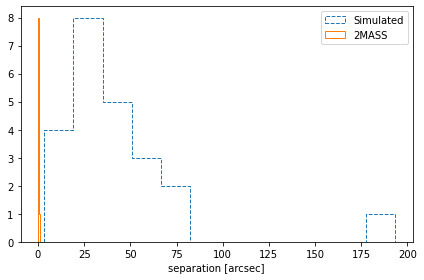

In [18]:
plt.hist(d2d_sim.arcsec, bins='auto', histtype='step', label='Simulated', linestyle='dashed')
plt.hist(d2d_sdss.arcsec, bins='auto', histtype='step', label='2MASS')
plt.xlabel('separation [arcsec]')
plt.legend(loc=0)
plt.tight_layout()

Muy bien, parece que las fuentes colocadas al azar están a un minuto de arco de distancia, así que probablemente podemos confiar en que nuestras primeras coincidencias (que estaban a un segundo de arco) son válidas.

## Explorando Gaia con Astroquery y el servicio TAP

In [19]:
from astroquery.gaia import Gaia

In [20]:
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print(table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.gaiaedr3_gcns_main_1
external.external.gaiaedr3_gcns_rejected_1
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour
gaiadr1.gaiadr1.ppmxl_neighbourhood
gaiadr1.gaiadr1.sdss_dr9_best_neighbour
gaiadr1.gaiadr1.sdss_dr9_neighbourhoo

Antes de empezar con Gaia, investiguemos un poco sobre nuestro cúmulo globular de interés https://en.wikipedia.org/wiki/NGC_2808

https://archive.eso.org/dss/dss

In [21]:
gc_name='ngc2808'

im_arcmin = 20
cutoutbaseurl = 'https://archive.eso.org/dss/dss/image'
endurl = '&Sky-Survey=DSS2-red&mime-type=download-gif&statsmode=WEBFORM'
query_string = urllib.parse.urlencode(dict(
                                     name=gc_name,
                                     x=im_arcmin, y=im_arcmin
                                          ))
url = cutoutbaseurl + '?' + query_string + endurl

urllib.request.urlretrieve(url, 'NGC2808_DSS2_cutout.jpg')

('NGC2808_DSS2_cutout.jpg', <http.client.HTTPMessage at 0x7f7d5ca9fb10>)

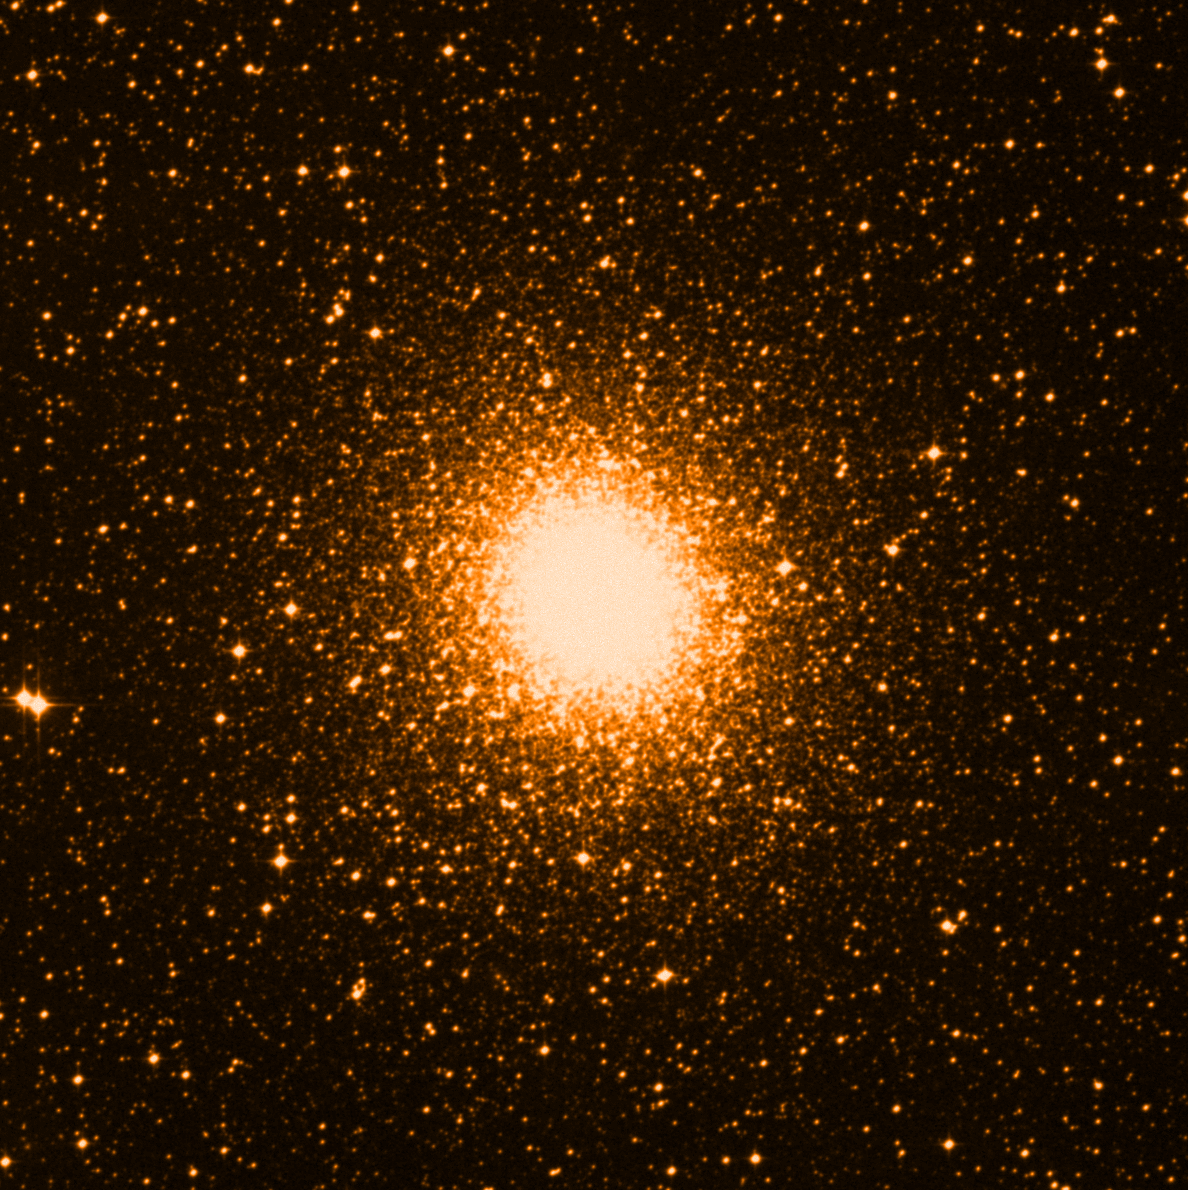

In [22]:
IPython.display.Image('NGC2808_DSS2_cutout.jpg')

In [23]:
ang_diam = 13*u.arcmin+0.8*u.arcsec

In [24]:
ngc2808_center = SkyCoord.from_name('ngc 2808')
ngc2808_center

<SkyCoord (ICRS): (ra, dec) in deg
    (138.012917, -64.8635)>

In [25]:
meanpar=0.112 # Vasiliev 2021 edr3 https://arxiv.org/pdf/2102.09568.pdf 1e-2 error
dist=1*u.kpc/meanpar 
dist

<Quantity 8.92857143 kpc>

In [26]:
1*u.kpc/0.122

<Quantity 8.19672131 kpc>

In [27]:
1*u.kpc/0.102

<Quantity 9.80392157 kpc>

In [28]:
r_gc=(dist*ang_diam/2).to(u.kpc*u.rad)/u.rad
r_gc

<Quantity 0.01689922 kpc>

In [29]:
prange=0.5*u.kpc
parmax=1/(dist-prange)
parmax

<Quantity 0.11864407 1 / kpc>

In [30]:
parmin=1/(dist+prange)
parmin

<Quantity 0.10606061 1 / kpc>

In [31]:
ang_diam.to(u.deg)

<Quantity 0.21688889 deg>

https://gaia.aip.de/cms/documentation/cone-search/

In [32]:
job2 = Gaia.launch_job_async("SELECT * \
FROM gaiaedr3.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiaedr3.gaia_source.ra,gaiaedr3.gaia_source.dec),CIRCLE('ICRS',138.01291667,-64.8635,0.22))=1 \
AND abs(parallax)>0.106 \
AND parallax IS NOT NULL \
AND parallax >0 \
AND abs(parallax)<0.119;", dump_to_file=True)

Saving results to: 1643647432225O-result.vot.gz


In [33]:
j = job2.get_results()
print (j['source_id'])

     source_id     
-------------------
5296420765959304704
5296420834685109504
5296420869039214208
5296421045134907264
5296421075197768448
5296796356561087360
5296796494002594176
5296796803237732864
5296796833304693632
5296796837597479552
                ...
5248755047113047168
5248755085772904576
5248755253275665408
5248755326295680896
5248755390709247104
5248755395003886080
5248755395015142016
5248755532448348288
5248755562508855168
5248755596870144512
5248755601173519104
Length = 400 rows


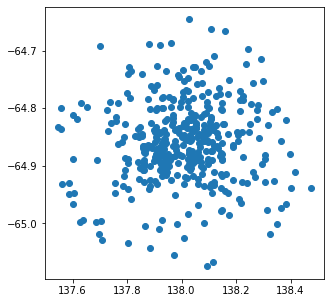

In [34]:
plt.figure(figsize=(5,5))
plt.scatter(j['ra'],j['dec'])

Text(0.5, 0, 'r (pc)')

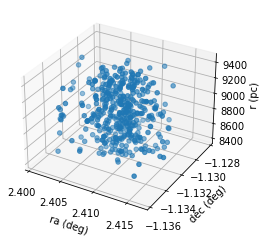

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(j['ra']*np.pi/180,j['dec']*np.pi/180,1000/j['parallax'])
ax.set_xlabel("ra (deg)")
ax.set_ylabel("dec (deg)")
ax.set_zlabel("r (pc)")

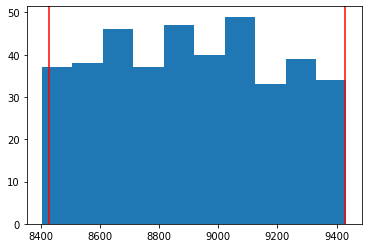

In [36]:
plt.hist(1000/j['parallax'])
plt.axvline(1000/parmin.value,c='r')
plt.axvline(1000/parmax.value,c='r')

Query sin ADQL explícito: https://astroquery.readthedocs.io/en/latest/gaia/gaia.html

In [37]:
j.columns

<TableColumns names=('solution_id','designation','source_id','random_index','ref_epoch','ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pm','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_n_obs_al','astrometric_n_obs_ac','astrometric_n_good_obs_al','astrometric_n_bad_obs_al','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','astrometric_params_solved','astrometric_primary_flag','nu_eff_used_in_astrometry','pseudocolour','pseudocolour_error','ra_pseudocolour_corr','dec_pseudocolour_corr','parallax_pseudocolour_corr','pmra_pseudocolour_corr','pmdec_pseudocolour_corr','astrometric_matched_transits','visibility_periods_used','astrometric_sigma5d_max','matched_transits','new_matched_transits','matched_transits_removed','ip

In [40]:
bp_rp = j['bp_rp'].data
mg = j['phot_g_mean_mag'].data

In [41]:
filt=~(np.isnan(mg.data) | np.isnan(bp_rp.data))
(~filt).sum()

36

In [42]:
x=bp_rp.data[filt]
y=mg.data[filt]

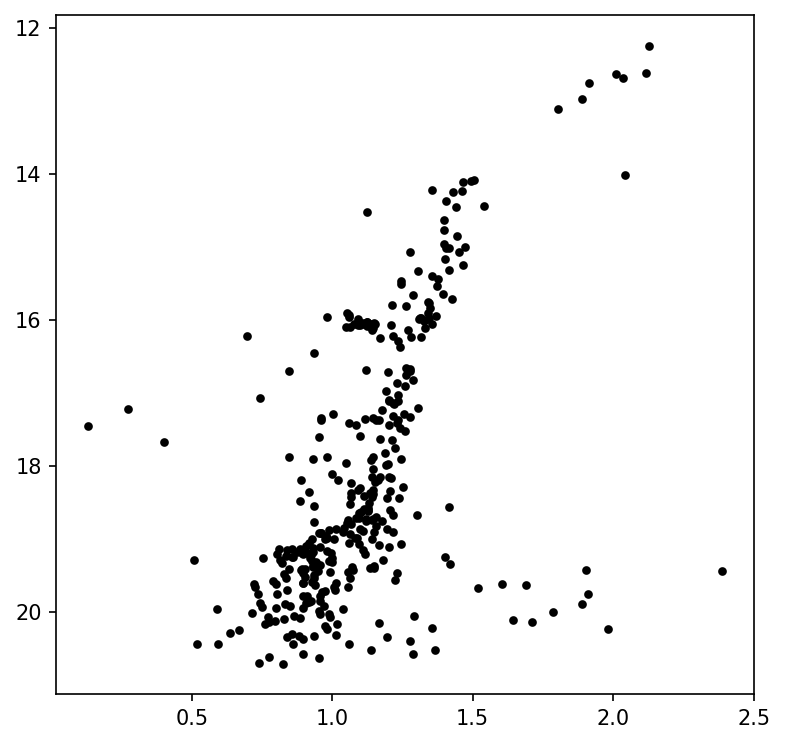

In [43]:
#plt.rc('text', usetex=True)
fig, ax = plt.subplots(figsize=(6, 6),dpi=150)
ax.scatter(x, y, alpha=1, s=10, color='k', zorder=0)
ax.invert_yaxis()
# ax.set_xlabel(r'$G_{BP} - G_{RP}$')
# ax.set_ylabel(r'$M_G$')
# ax.set_title('Diagrama HR para NGC 2808')

https://www.researchgate.net/figure/The-observed-and-modeled-color-magnitude-diagrams-of-the-globular-cluster-NGC-2808-Yi_fig5_305273888

## Revisando inconsistencias en otras bases de datos

In [44]:
from astroquery.simbad import Simbad

In [45]:
customSimbad = Simbad()

customSimbad.get_votable_fields()

['main_id', 'coordinates']

In [46]:
customSimbad.add_votable_fields('plx')

In [47]:
result_table = customSimbad.query_object("NGC 2808")
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,PLX_VALUE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mas,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float64,int32
NGC 2808,09 12 03.10,-64 51 48.6,6,6,100.000,100.000,90,C,O,2010AJ....140.1830G,0.060,1


In [52]:
result_table['PLX_VALUE']

0.060


In [53]:
dist=1*u.kpc/(result_table['PLX_VALUE'][0])
dist

<Quantity 16.75041876 kpc>

## Automatizando una búsqueda de Gaia

In [54]:
from astropy.io.votable import parse_single_table

In [56]:
votable = parse_single_table("lcc_simbad_votable.xml").to_table()

In [57]:
first="SELECT * \
    FROM gaiadr2.gaia_source \
    WHERE "
stor="OR "
last=    "AND abs(parallax)>3.69 ;"

In [58]:
(0.1*u.arcmin).to(u.deg)

<Quantity 0.00166667 deg>

In [59]:
coun=0
for i,j in zip(votable['RA_d'],votable['DEC_d']):
    quer="CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',%f,%f,0.00166))=1 "%(i,j)
    if coun==0:
        mainq=first+quer
    if coun>0:
        mainq+=stor+quer
    coun+=1
mainq+=last

In [61]:
mainq

In [62]:
coun

2026

In [63]:
job3=Gaia.launch_job(mainq, dump_to_file=True)

In [64]:
j = job3.get_results()
print (j['source_id'])

     source_id     
-------------------
6074702581258655232
6074653927874184320
6074661594397232896
6074670424850403712
6074699149593046912
6074699149583735552
6059835539108420992
6059835539127875072
6059835539127874688
6059846877842436864
                ...
5859345503663163776
5859345503663162624
6086973272761045120
6086968771639206656
6086973272764947072
6066618357619673856
6066618357619671296
6066589770321048704
6066622755660706176
6066589770309523968
6066589770308736768
Length = 2000 rows


In [65]:
j=j[j['parallax']>3]

In [66]:
j.write('lcc.dat',format='ascii')

In [68]:
tablelcc=Table.read('lcc.dat',format='ascii').to_pandas()
tablelcc=tablelcc[np.isfinite(tablelcc['parallax'])]
tablelcc=tablelcc[np.isfinite(tablelcc.radial_velocity)]
tablelcc=tablelcc.reset_index()
print(len(tablelcc),np.isnan(tablelcc['pmdec']).sum(),np.isnan(tablelcc['pmra']).sum())

116 0 0


In [69]:
tablelcc.to_csv('tablelcc.csv')

In [70]:
def astrosol(j):
    x=1000/j['parallax']*np.cos(j['dec']*np.pi/180)*np.cos(j['ra']*np.pi/180)
    y=1000/j['parallax']*np.cos(j['dec']*np.pi/180)*np.sin(j['ra']*np.pi/180)
    z=1000/j['parallax']*np.sin(j['dec']*np.pi/180)
    vx=[]
    vy=[]
    vz=[]
    xa=[]
    ya=[]
    za=[]
    for i in range(len(j)):
        mdec=j['dec'][i]
        mra=j['ra'][i]
        mpar=j['parallax'][i]
        mpmra=j['pmra'][i]
        mpmdec=j['pmdec'][i]
        mvr=j['radial_velocity'][i]
        c1 = coord.ICRS(ra=mra*u.degree, dec=mdec*u.degree,
                    distance=(mpar*u.mas).to(u.pc, u.parallax()),
                    pm_ra_cosdec=mpmra*u.mas/u.yr,
                    pm_dec=mpmdec*u.mas/u.yr,
                    radial_velocity=mvr*u.km/u.s)
        gc1 = c1.transform_to(coord.Galactocentric)
        vx+=[gc1.v_x.value]
        vy+=[gc1.v_y.value]
        vz+=[gc1.v_z.value]
        xa+=[gc1.x.value]
        ya+=[gc1.y.value]
        za+=[gc1.z.value]
    vx=np.array(vx)
    vy=np.array(vy)
    vz=np.array(vz)
    return x,y,z,vx,vy,vz,xa,ya,za

In [71]:
lccas=astrosol(tablelcc)
x2,y2,z2,vx2,vy2,vz2,xa2,ya2,za2=lccas

Text(0.5, 0, 'z (pc)')

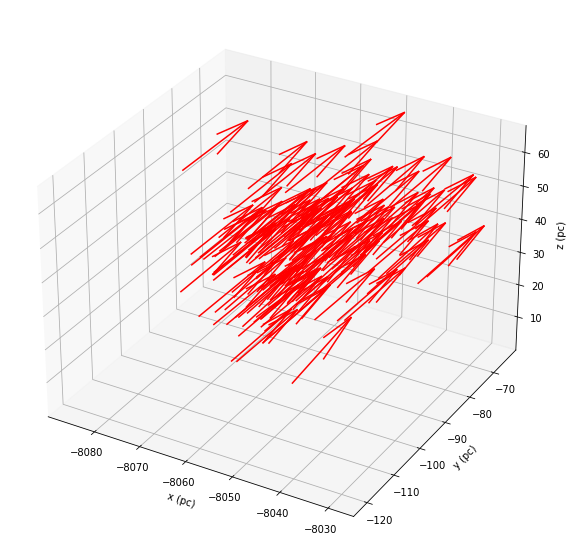

In [73]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
norm=10
ax.quiver(xa2,ya2,za2,vx2/norm,vy2/norm,vz2/norm,arrow_length_ratio=0.5,color='r')
ax.set_xlabel('x (pc)')
ax.set_ylabel('y (pc)')
ax.set_zlabel('z (pc)')